In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

%reload_ext autoreload
%autoreload 2

In [5]:
df = pd.read_csv('simulated_data_1.csv')

In [6]:
df

,customer_id,age,gender,income_bracket,region,household_size,tenure,payment_history,monthly_consumption,customer_satisfaction_score,complaints_last_year,churn_risk_score,flag_unsatisfied,treatment,churned,post_intervention_satisfaction
0,0,45.960570,M,bajo,urbano,2,8.005516,1,48.858802,5.221074,4,0.038997,0,0,0,4.998959
1,1,38.340828,M,medio,urbano,3,6.450702,0,56.754625,6.088374,0,0.061097,0,0,0,5.751741
2,2,47.772262,M,alto,urbano,2,7.502395,1,70.299616,6.890282,2,0.011009,0,0,0,6.789393
3,3,58.276358,M,medio,urbano,1,11.838634,1,55.603568,5.125064,1,0.020738,0,0,0,5.011462
4,4,37.190160,F,bajo,urbano,2,6.836628,0,47.798866,7.249211,1,0.014520,0,0,0,8.209611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,55.613225,F,medio,urbano,4,5.085338,0,75.055422,5.735858,0,0.082550,0,0,0,5.956706
9996,9996,18.000000,F,medio,urbano,4,0.630427,3,62.622381,3.665672,7,0.603910,1,0,1,4.095678
9997,9997,31.536199,M,medio,rural,3,7.375893,2,58.757085,6.775811,2,0.069775,0,0,1,6.254580
9998,9998,45.949187,F,medio,urbano,2,6.614678,1,45.539655,4.503459,5,0.570584,0,0,1,4.826571


# EDA

In [8]:
df.groupby('treatment')['churn_risk_score'].quantile([0.25, 0.5, 0.75])

treatment      
0          0.25    0.029087
           0.50    0.080610
           0.75    0.207486
1          0.25    0.416726
           0.50    0.602782
           0.75    0.738112
Name: churn_risk_score, dtype: float64

In [9]:
df.groupby('treatment')['churn_risk_score'].mean()

treatment
0    0.153018
1    0.569636
Name: churn_risk_score, dtype: float64

treatment
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
Name: churn_risk_score, dtype: object

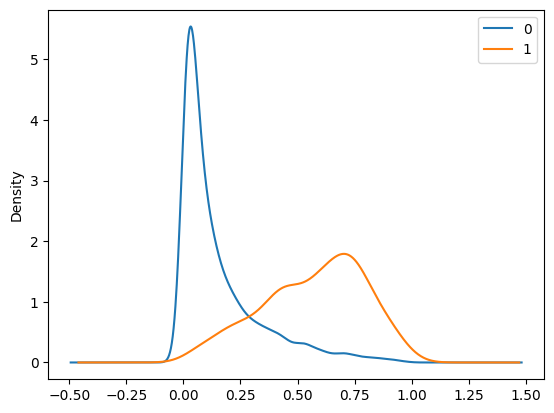

In [7]:
# Plot density plots of the two groups, treated and untreated, for the outcome variable, churn_risk_score
df.groupby('treatment')['churn_risk_score'].plot(kind='kde', legend=True)


In [11]:
import graphviz

dot = graphviz.Digraph(comment='Mock Dataset DAG')

# Nodos principales
dot.node('A', 'Age')
dot.node('I', 'IncomeBracket')
dot.node('R', 'Region')
dot.node('H', 'HouseholdSize')

dot.node('PH', 'PaymentHistory')
dot.node('MC', 'MonthlyConsumption')
dot.node('SAT', 'Satisfaction')
dot.node('CPL', 'Complaints')

dot.node('CRS', 'ChurnRiskScore')
dot.node('FU', 'flag_unsatisfied')
dot.node('T', 'Treatment')
dot.node('CH', 'Churned')

# Flechas desde demográficas a variables de relación
dot.edge('A', 'PH')
dot.edge('I', 'PH')
dot.edge('R', 'MC')
dot.edge('H', 'MC')
dot.edge('A', 'SAT')
dot.edge('I', 'SAT')
dot.edge('A', 'CPL')
dot.edge('I', 'CPL')
# (Puedes añadir más si lo deseas)

# Flechas de variables de relación a churn_risk_score
dot.edge('PH', 'CRS')
dot.edge('MC', 'CRS')
dot.edge('SAT', 'CRS')
dot.edge('CPL', 'CRS')

# Flechas a flag_unsatisfied
dot.edge('CRS', 'FU')
dot.edge('SAT', 'FU')  # Ejemplo: Satisfacción baja -> insatisfacción

# Flechas a Treatment
dot.edge('CRS', 'T')
dot.edge('FU', 'T')

# Flechas a Churned
dot.edge('CRS', 'CH')
dot.edge('T', 'CH')

# Opcional: Si consideras que PaymentHistory o Complaints afectan Churned directamente
# dot.edge('PH', 'CH')
# dot.edge('CPL', 'CH')

# Generar/mostrar
dot.render('mock_dataset_dag', view=True, format='png')
print(dot.source)


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH